# Part II - Fordgobike Data Exploration
## by Hassan Abdihakin


## Investigation Overview


> In this investigation, I wanted to focus on the user types trautsaffects  the total trips per week. The main focus  are gender of user type, duration of trips and thir age.



## Dataset Overview

> the fordgobike dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. contains 183412 rows 16 columns. among the columns are duration_sec,start_time,start_station_latitude,bike_share_for_all_trip,member_gender and age. for furher understanding on the data the link is here https://www.google.com/url?q=https%3A%2F%2Fvideo.udacity-data.com%2Ftopher%2F2020%2FOctober%2F5f91cf38_201902-fordgobike-tripdata%2F201902-fordgobike-tripdata.csv&sa=D&source=docs

In [13]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [14]:
# load in the dataset into a pandas dataframe
# import all packages and set plots to be embedded inline
df=pd.read_csv('/Users/abdihakinhassan/Desktop/Data_viz/fordgobike-tripdata.csv')
from datetime import datetime, date
df['start_time']=pd.to_datetime(df.start_time)
df['end_time']=pd.to_datetime(df.end_time)
def tweak_df(df):
    return(df
          .assign(
              
              member_birth_year=pd.to_datetime(df.member_birth_year),
              duration_minutes=df.duration_sec.apply(lambda x: x/60),
              age=datetime.now().year-df.member_birth_year,
              start_time_hour=df.start_time.dt.time,
              end_time_hour=df.end_time.dt.time,
              start_day_name=df.start_time.dt.day_name()
              
          )
            .dropna() 
          .astype({
            'user_type':'category',
            'member_gender':'category',
            'age':'int'
            
            
        }
        
        
        )
         .drop(columns=['member_birth_year'])
         
          .query("duration_minutes<60")
            .query("age<80")
           .reset_index()
           .drop(columns=['index'])
          )

df_clean=tweak_df(df)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [15]:
reset_color=sb.color_palette()[0] # rseting color to avoid distraction

## Distribution of Duration of Trips

> the distrinution is right skewed and most of the trips took under 13 minutes. on avarage, every signle trip took atleast 1 minute.


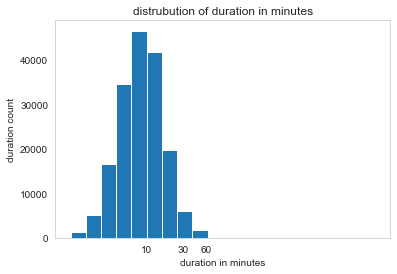

In [16]:
# setting log scale so as to avoid longer tail or streched distribution
bins = 10 ** np.arange(0, 4+0.1, 0.2)
plt.hist(data=df_clean, x='duration_minutes', bins=bins);
ticks = [ 10, 30, 60]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
plt.title('distrubution of duration in minutes')
plt.xlabel('duration in minutes')
plt.ylabel('duration count');
plt.xscale('log')

plt.xticks(ticks, labels);

## How gender  impacts on the number of trips

> male seems to be the dominant gender that rides most of the trips while female comes next and others make the least trip riders.

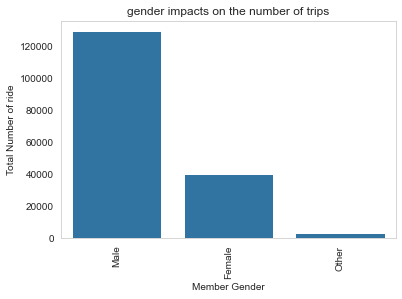

In [17]:
# we will contnue using the grouping of users in their respective variables done in above section.
# But first let's see the overal impact of gender to the total trips 
order = df_clean['member_gender'].value_counts().index
sb.countplot(data=df_clean, x='member_gender',color=reset_color,order=order)
plt.title('gender impacts on the number of trips')
plt.xlabel('Member Gender')
plt.ylabel('Total Number of ride');
plt.xticks(rotation=90);

##  how much do female subsribers impact the total trips per week made by the subsribers group.



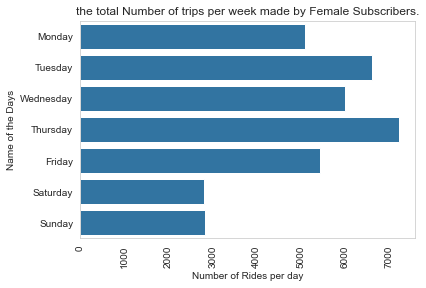

In [18]:
# let's get the group under study that is Subscriber by first grouping the data into user_type
# then get the Subscribers data
# after that the Subscribers data is assigned to df_member variable
# also the customer is assigned to df_Cutomer Vaiarible
df_member=df_clean.groupby('user_type').get_group('Subscriber')
df_customer=df_clean.groupby('user_type').get_group('Customer')
# get female group from the above df_member grouped data and assign to df_member_females then plot.
sb.set_style("whitegrid", {'axes.grid' : False})
df_member_females=df_member.query("member_gender=='Female'")['start_day_name']
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
sb.countplot(data=df_member, y=df_member_females,color=reset_color,order=order)
plt.xticks(rotation=90);
plt.title('the total Number of trips per week made by Female Subscribers.')
plt.ylabel('Name of the Days')
plt.xlabel('Number of Rides per day')
plt.show();

# The relationship between age and members gender
>  members have approximately same mean and this supports the above observation that regardless of gender type the companies clients revenue comes from people from between 21-42.others who did not or forget to identify themselves with male or female have greater mean than the rest of the group

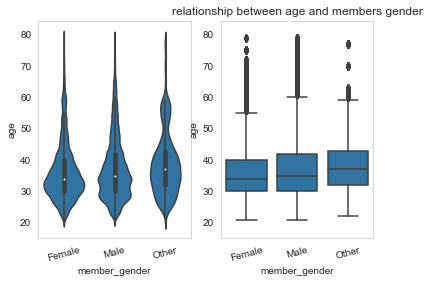

In [19]:

plt.subplot(1, 2, 1)
# plot of the left is: violin plot
ax1 = sb.violinplot(data=df_clean, x='member_gender', y='age', color=reset_color)
plt.xticks(rotation=15);

# plot of the right is: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='member_gender', y='age', color=reset_color)
plt.xticks(rotation=15)
plt.title('relationship between age and members gender')
plt.ylim(ax1.get_ylim()) ;

# where do the higest  cilients of the company come from interms of gender
> females contribute less on customers but females subs are close to 40k. others are largely subsccribers while male are the highest controbuters of the overal subscribers and the highest on customers. this can be said that men are the trip makers of the company and bring the highest revenue.

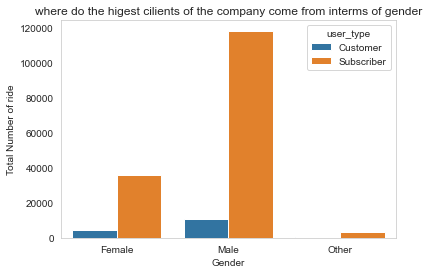

In [20]:
sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type');
plt.title('where do the higest cilients of the company come from interms of gender')
plt.xlabel('Gender')
plt.ylabel('Total Number of ride');


# The number of duration of trips made by member the gender feature
> to my suprise cutomers are making longer duration trips than subscribers and the gender that makes longest duration in customers are females. this could however be slow riding of females due to their nature of care or females do ride in distance.

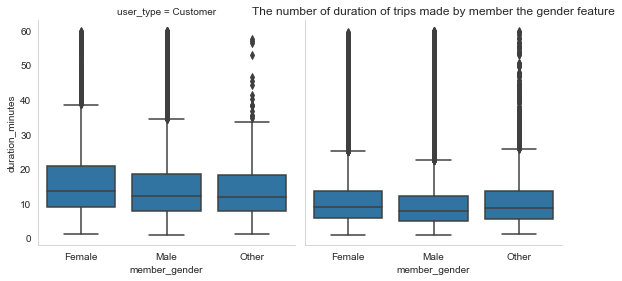

In [21]:
g = sb.FacetGrid(data = df_clean, col = 'user_type', size = 4)
g.map(sb.boxplot, 'member_gender', 'duration_minutes');
plt.title('The number of duration of trips made by member the gender feature');


# comparing the number of total trips made by each gender
> Finally  cutomers make longest duration. and the longest duration in a trip is made by  females.

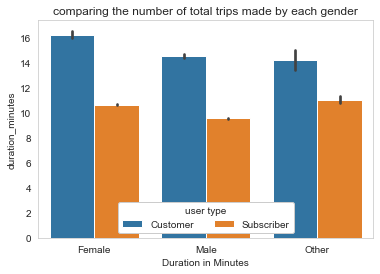

In [22]:
ax = sb.barplot(data = df_clean, x = 'member_gender', y = 'duration_minutes', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user type')
plt.xlabel('Duration in Minutes')
plt.title('comparing the number of total trips made by each gender');


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [23]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 732677 bytes to Part_II_slide_deck_template.slides.html


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
